# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import pandas as pd
import os
import time

# Reading the band images 

In [2]:
dataset_path = "/home/biswajitrana/Documents/2nd_semester/RKMVERI_2ND/class/ML/SS_assignments_4/"
dataset_dir = os.listdir(dataset_path)

In [3]:
image_arr1 = np.ndarray(shape = (512,512,4),dtype = np.int64)
for i in range(4):
    img = plt.imread(dataset_path + 'band' + str(i+1)+ '.gif')
    image_arr1[:,:,i] = np.array(img[:,:,0])

In [4]:
print(image_arr1.shape)
image_arr1[[0,1],[0,1],:]

(512, 512, 4)


array([[41, 27, 26, 42],
       [42, 27, 27, 43]])

In [5]:
image_arr=image_arr1.reshape(512*512,4)

In [6]:
image_arr.shape

(262144, 4)

# Implementing K-Means clustering

In [7]:
C=np.zeros((2,4))
for i in range(2):
    C[i]=np.random.randint(0,80,4)
print(C)

[[37. 62.  0. 55.]
 [79. 59. 45. 34.]]


#### K-means

In [8]:
def k_means(k, X, error):
    C = X[np.random.choice(X.shape[0], k, replace=False)]
    all_centroids = [C.copy()]
    flag = True
    while flag:
        dist = np.sqrt(((X[:, np.newaxis] - C) ** 2).sum(axis=2))
        label = np.argmin(dist, axis=1)
        new_centroids = np.array([X[label == i].mean(axis=0) for i in range(k)])
        all_centroids.append(new_centroids)
        if np.sum(np.abs(all_centroids[-1] - all_centroids[-2])) < error:
            flag = False
        else:
            C = new_centroids.copy()
    
    return all_centroids, label

#### Plot

In [9]:
def plot(label):
    plt.imshow(label, cmap="magma")
    plt.colorbar()
    plt.show()

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
 For K =  2 


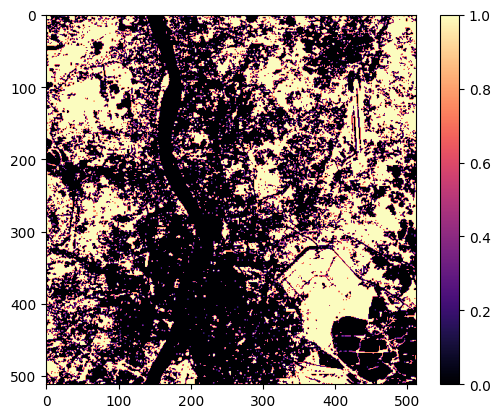

 Time taken =  0.715552806854248 
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
------------------------------------------------------------------------------------------------------------------------------------------------------
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
 For K =  3 


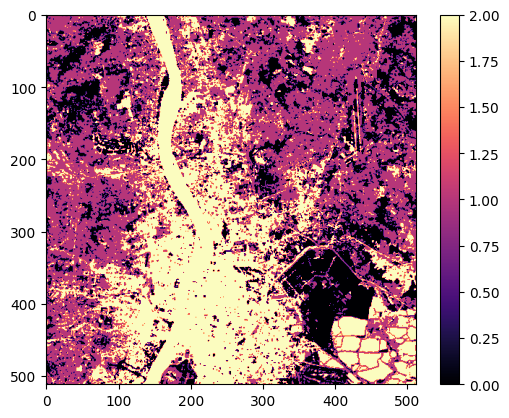

 Time taken =  0.8509624004364014 
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
------------------------------------------------------------------------------------------------------------------------------------------------------
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
 For K =  4 


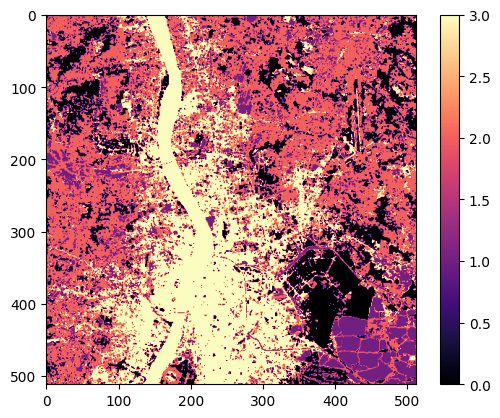

 Time taken =  1.2569794654846191 
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
------------------------------------------------------------------------------------------------------------------------------------------------------
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
 For K =  5 


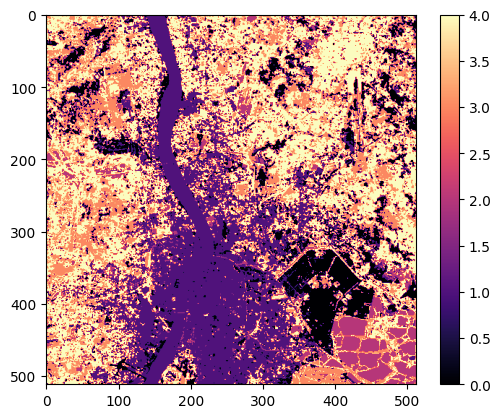

 Time taken =  1.3457660675048828 
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
------------------------------------------------------------------------------------------------------------------------------------------------------
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
 For K =  6 


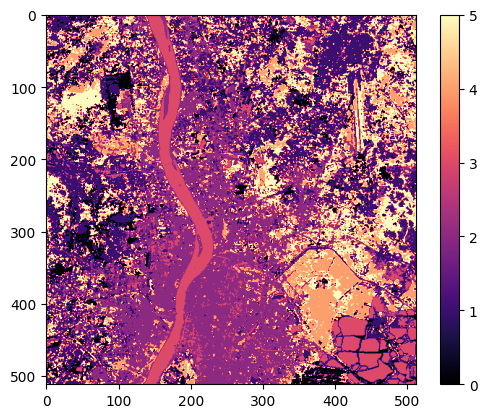

 Time taken =  3.238447904586792 
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
------------------------------------------------------------------------------------------------------------------------------------------------------


In [171]:
K=[2,3,4,5,6]
err=0.005
for k in K:
    s=time.time()
    l=k_means(k,image_arr,err)
    label=l[1]
    # print(label)
    label=label.reshape(512,512)
    print("|||"*50)
    print("\033[1m" , "For K = ",k, "\033[0m")
    plot(label)
    e=time.time()
    print("\033[1m" , "Time taken = ",e-s, "\033[0m")
    print("|||"*50)
    print("---"*50)

# For k=2

In [151]:
l=k_means(2,image_arr,err)

In [152]:
print(l)

([array([[42, 26, 28, 31],
       [37, 22, 19, 18]]), array([[40.82082734, 25.91720224, 26.8758713 , 34.14066747],
       [36.85867381, 21.93946752, 19.79855995, 22.08380777]]), array([[40.9049403 , 26.00722334, 27.01062988, 34.39676172],
       [37.57654848, 22.59559564, 21.2601353 , 24.26670825]]), array([[40.93307334, 26.02748467, 27.06828237, 35.13302634],
       [39.05460509, 24.15705999, 23.76478939, 25.24125609]]), array([[40.92839094, 26.09419048, 27.08933764, 36.10063349],
       [39.81492075, 24.70964983, 25.01797272, 26.40213785]]), array([[40.92889801, 26.17255879, 27.10823925, 36.88176495],
       [40.09452753, 24.9103141 , 25.50415784, 27.36869155]]), array([[40.97501316, 26.27288564, 27.18739478, 37.48134112],
       [40.16485231, 24.97328791, 25.65285357, 28.06567685]]), array([[41.06412562, 26.39238113, 27.31999545, 37.93138893],
       [40.149448  , 24.97573827, 25.66558818, 28.5648777 ]]), array([[41.1648852 , 26.51438286, 27.4745922 , 38.26827368],
       [40.117211

In [153]:
label=l[1]
print(label)
label=label.reshape(512,512)


[0 0 0 ... 1 1 1]


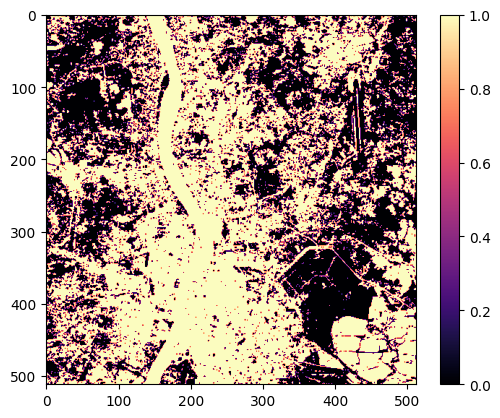

In [154]:
plot(label)

# For k=3

In [155]:
l3=k_means(3,image_arr,err)

In [156]:
print(l3)

([array([[39, 24, 20, 32],
       [49, 34, 38, 40],
       [41, 24, 26, 28]]), array([[38.86404416, 24.26843214, 23.74997179, 36.17974157],
       [44.70622429, 29.99313322, 32.75024646, 40.63330727],
       [41.18838367, 25.97980078, 27.4697249 , 29.77462794]]), array([[38.97551136, 24.38235795, 24.17178977, 36.39633523],
       [43.93599125, 29.24499818, 31.63379118, 40.34197156],
       [40.98891768, 25.72380837, 26.92181719, 28.61859994]]), array([[39.04422277, 24.43439401, 24.29871786, 36.26998163],
       [43.65775801, 28.95255414, 31.21509622, 39.99582277],
       [40.84667835, 25.57046629, 26.66871622, 28.18061431]]), array([[39.06777849, 24.4420028 , 24.33683972, 36.1103659 ],
       [43.52458543, 28.81072294, 31.01258128, 39.81001116],
       [40.79639062, 25.51533748, 26.57754907, 27.94696984]]), array([[39.060626  , 24.42527525, 24.32741616, 35.97696437],
       [43.44967995, 28.73552374, 30.8996374 , 39.74247974],
       [40.79906225, 25.51246891, 26.57128955, 27.82894439]

In [157]:
label3=l3[1]
print(label)
label3=label3.reshape(512,512)

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [1 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


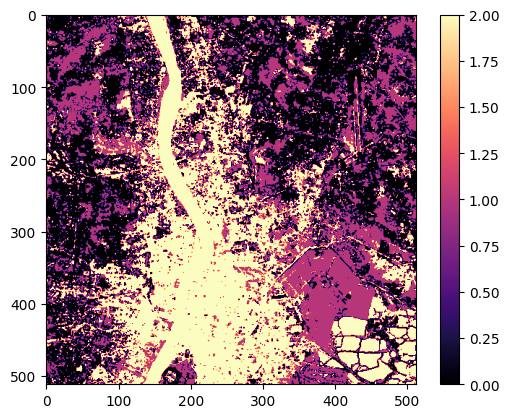

In [158]:
plot(label3)

# For k=4

In [159]:
l4=k_means(4,image_arr,err)

In [160]:
print(l4)

([array([[49, 36, 34, 45],
       [41, 27, 26, 37],
       [39, 24, 21, 23],
       [40, 26, 27, 30]]), array([[46.55579795, 31.7907367 , 35.16873637, 42.21597583],
       [40.37714175, 25.75810978, 26.24456187, 37.95362106],
       [37.3276563 , 22.33650148, 20.65020327, 23.99582463],
       [40.82571381, 25.62208148, 26.91874465, 29.65971016]]), array([[45.61075493, 30.82371652, 34.04905323, 40.70518364],
       [39.95874894, 25.39182524, 25.69294969, 37.9800968 ],
       [37.11294472, 22.2140465 , 20.5550648 , 25.07066932],
       [41.05479671, 25.80329774, 27.1412492 , 29.64839814]]), array([[44.99226795, 30.21411558, 33.16786984, 40.14650592],
       [39.64151886, 25.08947136, 25.21903764, 37.79154096],
       [37.20498422, 22.31434193, 20.79952453, 25.9599131 ],
       [41.28893589, 26.00442752, 27.48172589, 29.55061102]]), array([[44.59581839, 29.83184647, 32.59569576, 39.9738496 ],
       [39.47566562, 24.92109507, 24.96808184, 37.60068665],
       [37.39022614, 22.48310905, 21

In [161]:
label4=l4[1]
print(label)
label4=label4.reshape(512,512)

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [1 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


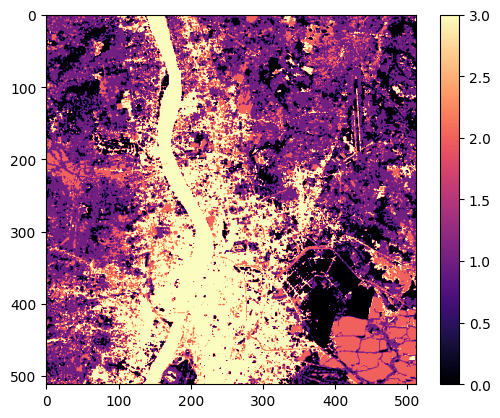

In [162]:
plot(label4)

# For k=5

In [163]:
l5=k_means(5,image_arr,err)

In [164]:
print(l5)

([array([[41, 27, 29, 38],
       [38, 23, 21, 32],
       [40, 25, 23, 32],
       [41, 25, 26, 31],
       [39, 26, 26, 34]]), array([[42.30789516, 27.67676944, 29.23380535, 39.78381723],
       [37.23806721, 22.5201686 , 21.17453552, 30.36108037],
       [39.60736571, 24.40545307, 23.47470157, 32.04788388],
       [41.60804002, 26.20479138, 27.87354543, 28.58233163],
       [39.3318978 , 24.81729381, 25.33389472, 35.56435858]]), array([[42.88741322, 28.25402271, 30.02612105, 40.37198399],
       [37.05425463, 22.27093429, 20.85479006, 27.60605239],
       [39.31415161, 24.21365382, 24.12894325, 31.95582421],
       [42.02270667, 26.63301037, 28.54255199, 28.25899484],
       [39.38083418, 24.79634226, 25.03648601, 36.56804581]]), array([[43.31681629, 28.66868758, 30.68541837, 40.4833858 ],
       [37.20430594, 22.28617305, 20.78366276, 25.29675698],
       [39.13874491, 24.15219614, 24.33525835, 32.04695375],
       [42.25091137, 26.85572711, 28.85303128, 28.29995711],
       [39.40

In [165]:
label5=l5[1]
print(label)
label5=label5.reshape(512,512)

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [1 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


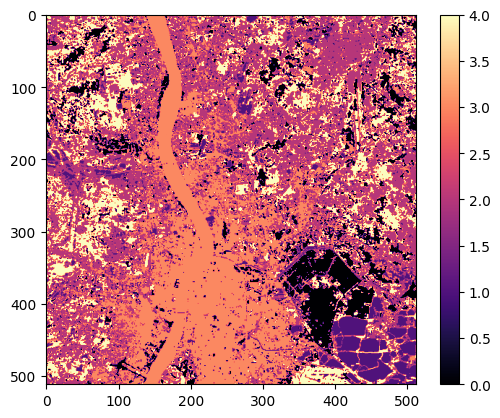

In [166]:
plot(label5)

# For k=6

In [167]:
l6=k_means(6,image_arr,err)

In [168]:
print(l6)

([array([[39, 26, 29, 41],
       [42, 27, 29, 35],
       [42, 26, 25, 37],
       [43, 29, 31, 34],
       [41, 25, 22, 35],
       [39, 24, 24, 35]]), array([[40.95760286, 26.78768634, 27.86923077, 42.84985092],
       [41.59246224, 26.264812  , 28.14023204, 32.00774645],
       [40.97903391, 25.9908547 , 25.5078562 , 37.86982536],
       [44.47320076, 29.48495924, 32.15408661, 31.40793998],
       [39.75708373, 24.25469596, 21.60315186, 30.46298949],
       [38.38312756, 23.6023584 , 23.645654  , 31.75430902]]), array([[41.96370391, 27.63600378, 28.78986633, 43.18699187],
       [41.46051957, 26.01836895, 27.88100118, 30.76127905],
       [40.027314  , 25.41037476, 25.58276825, 37.73012707],
       [44.81858229, 29.94589414, 32.63783711, 30.67899657],
       [38.29932886, 23.06964952, 21.47013423, 25.84522744],
       [38.27521587, 23.54594685, 23.66795072, 32.64480051]]), array([[42.75792056, 28.31667455, 29.81835914, 42.7811207 ],
       [41.43550731, 25.94252623, 27.74916441, 30

In [169]:
label6=l6[1]
print(label)
label6=label6.reshape(512,512)

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [1 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


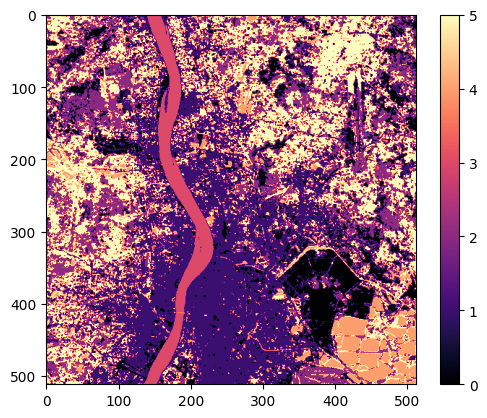

In [170]:
plot(label6)